In [2]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pl.read_csv("enhanced_student_habits_performance_dataset.csv", null_values=['N/A'])
df.head()

student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
i64,i64,str,str,f64,f64,f64,str,f64,f64,str,i64,str,str,f64,str,f64,i64,f64,str,i64,f64,str,str,str,i64,i64,i64,str,f64,i64
100000,26,"""Male""","""Computer Science""",7.645367,3.0,0.1,"""Yes""",70.3,6.2,"""Poor""",3,"""Some College""","""High""",6.0,"""Yes""",4.0,5,5.8,"""No""",0,10.9,"""Co-Learning Group""","""Yes""","""High""",9,7,8,"""Reading""",3.0,100
100001,28,"""Male""","""Arts""",5.7,0.5,0.4,"""No""",88.4,7.2,"""Good""",4,"""PhD""","""Low""",6.8,"""No""",4.0,7,5.8,"""No""",5,8.3,"""Co-Learning Group""","""Yes""","""Low""",7,2,10,"""Reading""",6.0,99
100002,17,"""Male""","""Arts""",2.4,4.2,0.7,"""No""",82.1,9.2,"""Good""",4,"""High School""","""Low""",5.7,"""Yes""",3.79,4,8.0,"""No""",5,8.0,"""Library""","""Yes""","""High""",3,9,6,"""Kinesthetic""",7.6,98
100003,27,"""Other""","""Psychology""",3.4,4.6,2.3,"""Yes""",79.3,4.2,"""Fair""",3,"""Master""","""Medium""",8.5,"""Yes""",4.0,6,4.6,"""No""",3,11.7,"""Co-Learning Group""","""Yes""","""Low""",5,3,10,"""Reading""",3.2,100
100004,25,"""Female""","""Business""",4.7,0.8,2.7,"""Yes""",62.9,6.5,"""Good""",6,"""PhD""","""Low""",9.2,"""No""",4.0,4,5.7,"""No""",2,9.4,"""Quiet Room""","""Yes""","""Medium""",9,1,10,"""Reading""",7.1,98


### Descrição da base
A base é sintética, contém cerca de 80000 linhas e as seguintes colunas:
- `student_id`: Identificador único do estudante.
- `age`: Idade do estudante (16–28).
- `gender`: Masculino, Feminino ou Outro.
- `major`: Área de estudo (por exemplo, Ciência da Computação, Engenharia, Artes).
- `study_hours_per_day`: Média de horas estudadas diariamente.
- `social_media_hours`, netflix_hours, screen_time: Tempo gasto em várias telas.
- `part_time_job`: Se o estudante tem um emprego (Sim/Não).
- `attendance_percentage`: Frequência acadêmica em porcentagem.
- `sleep_hours`, exercise_frequency, diet_quality: Fatores de estilo de vida.
- `mental_health_rating`, stress_level, exam_anxiety_score: Indicadores psicológicos (1–10).
- `extracurricular_participation`, access_to_tutoring: Suporte e engajamento.
- `family_income_range`, parental_support_level, parental_education_level: Antecedentes e suporte.
- `motivation_level`, time_management_score: Habilidades de autogestão (1–10).
- `learning_style`: Método de aprendizagem preferido.
- `study_environment`: Local comum para estudar.
- `dropout_risk`: Sim/Não — derivado dos níveis de estresse e motivação.
- `previous_gpa`: Score da performance acadêmica do estudante.
-`exam_score`: Indicadores de desempenho alvo.

In [4]:
numeric_columns = []
for column in df.columns:
    if df[column].dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32, pl.Int16, pl.Int8]:
        numeric_columns.append(column)

print(f"\nColunas numéricas encontradas: {numeric_columns}")


Colunas numéricas encontradas: ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score', 'exam_score']


-  Dentre essas variavéis númericas, as seguines colunas não nos interessam para a correlação:
    - `student_id`, `age`,`mental_health_rating`,`semester`,`parental_support_level`

In [5]:
df_numeric = df.select(numeric_columns)
df_dropped = df_numeric.drop(['student_id', 'age','mental_health_rating','semester','parental_support_level'])


### Correlações

In [ ]:
df.null_count() #Não tem valores nulos

student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
correlation_matrix = df_dropped.corr()
print("Matriz de correlação:")
print(correlation_matrix)


Matriz de correlação:
shape: (14, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ study_hou ┆ social_me ┆ netflix_h ┆ attendanc ┆ … ┆ motivatio ┆ exam_anxi ┆ time_mana ┆ exam_sco │
│ rs_per_da ┆ dia_hours ┆ ours      ┆ e_percent ┆   ┆ n_level   ┆ ety_score ┆ gement_sc ┆ re       │
│ y         ┆ ---       ┆ ---       ┆ age       ┆   ┆ ---       ┆ ---       ┆ ore       ┆ ---      │
│ ---       ┆ f64       ┆ f64       ┆ ---       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ f64      │
│ f64       ┆           ┆           ┆ f64       ┆   ┆           ┆           ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 1.0       ┆ -0.001322 ┆ -0.004699 ┆ 0.004509  ┆ … ┆ 0.000812  ┆ -0.001437 ┆ 0.001461  ┆ 0.24146  │
│ -0.001322 ┆ 1.0       ┆ -0.006302 ┆ 0.003496  ┆ … ┆ 0.000105  ┆ 0.001991  ┆ 0.003953  ┆ -0.00635 │
│           ┆           ┆           ┆           ┆   ┆

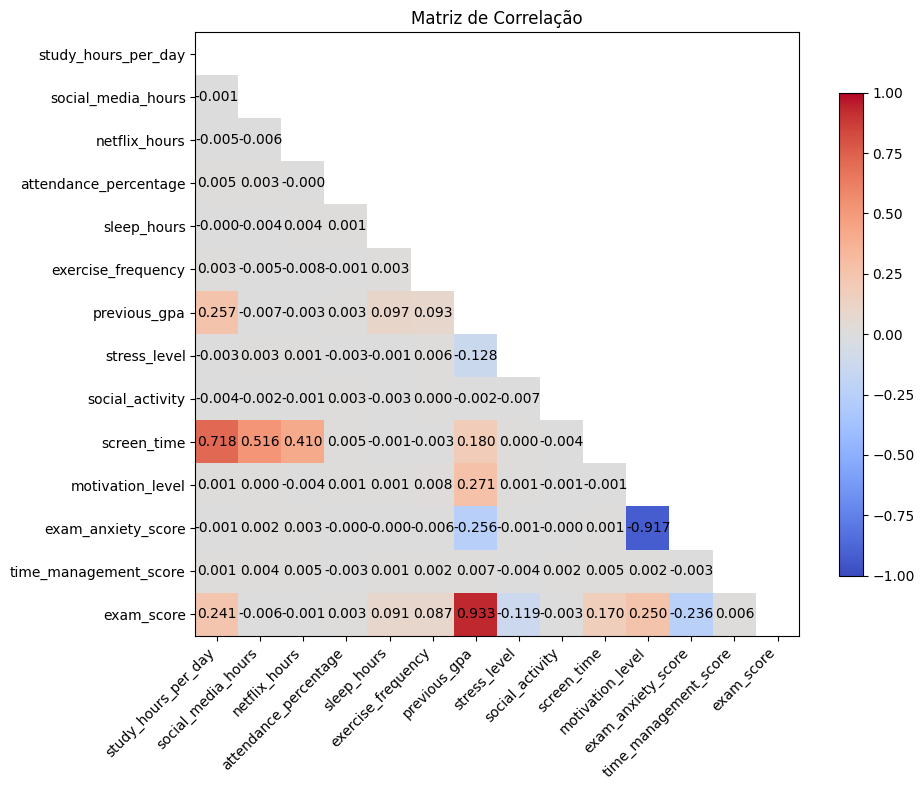

In [12]:
correlation_values = correlation_matrix.to_numpy()
column_names = correlation_matrix.columns

mask = np.triu(np.ones_like(correlation_values, dtype=bool))

correlation_values_masked = correlation_values.copy()
correlation_values_masked[mask] = np.nan

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_values_masked, cmap='coolwarm', vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(column_names)))
ax.set_yticks(np.arange(len(column_names)))
ax.set_xticklabels(column_names, rotation=45, ha='right')
ax.set_yticklabels(column_names)


for i in range(len(column_names)):
    for j in range(len(column_names)):
        if not mask[i, j]:  
            text = ax.text(j, i, f'{correlation_values[i, j]:.3f}',
                          ha="center", va="center", color="black")

# Adicionar colorbar
plt.colorbar(im, ax=ax, shrink=0.8)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()
plt.show()

- Pode-se observar que nossa varíavel de objetivo `exam_score` possui forte correlação com `previous_gpa` e a segunda mais forte correlação é com `motivation_level`. Vale ressaltar que `motivation_level` possui correlação com `previous_gpa` de valor semelhante, no entanto todas outras variavéis de correlação mais forte compartilham dessa relação.